In [ ]:
import pandas as pd
data = pd.read_csv("data.csv", delimiter=',')

In [ ]:
data.head(5)

,Штат,Длина счета,Код зоны,Номер телефона,Услуга международных звонков,Услуга VMail,Количество VMail,Дневные минуты,Дневные звонки,Дневная оплата,Вечерние минуты,Вечерние звонки,Вечерняя оплата,Ночные минуты,Ночные звонки,Ночная оплата,Международные минуты,Международные звонки,Международная оплата,Обращений в СЦ,Уход
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Штат                          3333 non-null   object 
 1   Длина счета                   3333 non-null   int64  
 2   Код зоны                      3333 non-null   int64  
 3   Номер телефона                3333 non-null   object 
 4   Услуга международных звонков  3333 non-null   bool   
 5   Услуга VMail                  3333 non-null   bool   
 6   Количество VMail              3333 non-null   int64  
 7   Дневные минуты                3333 non-null   float64
 8   Дневные звонки                3333 non-null   int64  
 9   Дневная оплата                3333 non-null   float64
 10  Вечерние минуты               3333 non-null   float64
 11  Вечерние звонки               3333 non-null   int64  
 12  Вечерняя оплата               3333 non-null   float64
 13  Ноч

In [ ]:
data.isnull().sum()

Штат                            0
Длина счета                     0
Код зоны                        0
Номер телефона                  0
Услуга международных звонков    0
Услуга VMail                    0
Количество VMail                0
Дневные минуты                  0
Дневные звонки                  0
Дневная оплата                  0
Вечерние минуты                 0
Вечерние звонки                 0
Вечерняя оплата                 0
Ночные минуты                   0
Ночные звонки                   0
Ночная оплата                   0
Международные минуты            0
Международные звонки            0
Международная оплата            0
Обращений в СЦ                  0
Уход                            0
dtype: int64

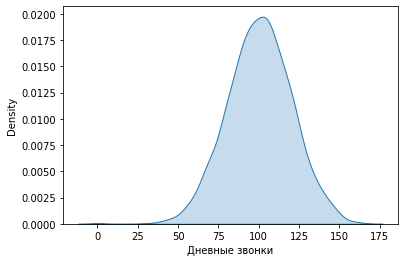

In [ ]:
import seaborn as sns
snsplot = sns.kdeplot(data['Дневные звонки'], shade=True)
fig = snsplot.get_figure()


In [ ]:
data = data.drop(['Длина счета', "Код зоны", "Номер телефона", "Штат"], axis =1)
#data = data.drop(['Длина счета'])

In [ ]:
data['Уход'].value_counts()

False    2850
True      483
Name: Уход, dtype: int64

In [ ]:
#remapping = {'FALSE': 0,'TRUE': 1}

data["Услуга международных звонков"] = data["Услуга международных звонков"].astype(int)
data["Услуга VMail"] = data["Услуга VMail"].astype(int)
data["Уход"] = data["Уход"].astype(int)



In [ ]:
data.head(15)

,Услуга международных звонков,Услуга VMail,Количество VMail,Дневные минуты,Дневные звонки,Дневная оплата,Вечерние минуты,Вечерние звонки,Вечерняя оплата,Ночные минуты,Ночные звонки,Ночная оплата,Международные минуты,Международные звонки,Международная оплата,Обращений в СЦ,Уход
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [ ]:
x = data
x = x.drop(['Уход'], axis =1)
y = data['Уход']



In [ ]:
data.head(5)

,Услуга международных звонков,Услуга VMail,Количество VMail,Дневные минуты,Дневные звонки,Дневная оплата,Вечерние минуты,Вечерние звонки,Вечерняя оплата,Ночные минуты,Ночные звонки,Ночная оплата,Международные минуты,Международные звонки,Международная оплата,Обращений в СЦ,Уход
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
#Построение модели - решающего дерева
x.isnull().sum()

Услуга международных звонков    0
Услуга VMail                    0
Количество VMail                0
Дневные минуты                  0
Дневные звонки                  0
Дневная оплата                  0
Вечерние минуты                 0
Вечерние звонки                 0
Вечерняя оплата                 0
Ночные минуты                   0
Ночные звонки                   0
Ночная оплата                   0
Международные минуты            0
Международные звонки            0
Международная оплата            0
Обращений в СЦ                  0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split as tts
#x.info()
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=42)

In [ ]:
len(x_train)


2666

In [ ]:
len(x_test)

667

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_tree= DecisionTreeClassifier(max_depth=3)
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(model_tree, feature_names = ["Услуга международных звонков",	"Услуга VMail",	"Количество VMail",	"Дневные минуты",	"Дневные звонки",	"Дневная оплата",	"Вечерние минуты",	"Вечерние звонки",	"Вечерняя оплата",	"Ночные минуты",	"Ночные звонки",
"Ночная оплата",	"Международные минуты",	"Международные звонки",	"Международная оплата",	"Обращений в СЦ"],
out_file = 'tree.dot', filled=True)
!dot -Tpng 'tree.dot' -o 'tree.png'

In [ ]:
!ls

data.csv  sample_data  tree.dot  tree.png


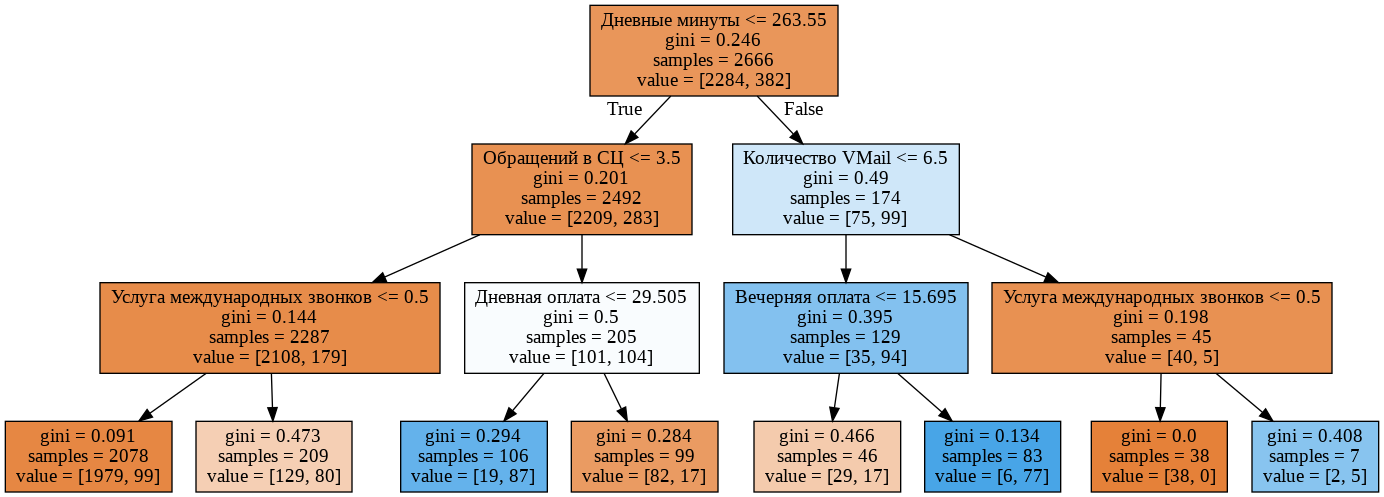

In [ ]:
from IPython.display import Image
Image(filename='tree.png') 

In [ ]:
y_predict = model_tree.predict(x_test)


In [ ]:
y_predict[:5]

array([0, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.8935532233883059
